Group Name: AG 40.

Student Name (Student ID):

1. TANAMATE FOO YONG QIN (A0237342J)

2. SURESH KUMAR SARAD (A0097808M)

3. LI TIANSHENG (A0243714J)

# Question 1

Consider the maze shown below. The Maze has 16 rows and 24 columns The objective is to find a shortest path from cell $S$ to cell $G$.


![Maze](Maze_Assignment_1.jpg)


The agent can take four actions in each cell: 'RIGHT', 'DOWN', 'UP', 'LEFT'.  

Each cell is represented as $(x,y)$, where $x$ indicates row number and $y$ indicates column number. Action 'UP' takes the agent from cell $(x,y)$ to $(x+1,y)$. Action 'DOWN' takes the agent from cell $(x,y)$ to $(x-1,y)$. Action 'RIGHT' takes the agent from cell $(x,y)$ to $(x,y+1)$. Action 'LEFT' takes the agent from cell $(x,y)$ to $(x,y-1)$. The triplet $(s,a,s')$  indicates that taking action $a$ at state $s$ leads to state $s'$. Actions 'LEFT' or 'RIGHT' cost 10 units for all $(s,a,s')$. Actions 'UP' or 'DOWN' cost 1 unit for all  $(s,a,s')$.  The agent cannot move into cells that are shaded. Assume that the agent knows the boundaries of the maze and has full observability. Consequently, at the bottom (row 0) and top (row 15), the agent will not take actions 'DOWN' and 'UP', respectively; at left (column 0) and right (column 23) columns, the agent will not take 'LEFT' and 'RIGHT' actions, respectively. Similalry, the agent will not take actions that lead to shaded region in the maze.

## **Q1.a: Class Maze(Problem)** [3 Marks]

Write a Maze class to create a model for this problem. You should not use an explicit state space model. The modelling should inherit the abstract class 'Problem' (given below). With the problem formulation, find the shortest path from S to G cell. Propose and implement multiple heuristics (at least two heuristics) for informed search algorithms. 

### Blocked Rows and Columns:
[(14,9), (13,10), (12,10), (11,10), (10,10), (10,9), (9,9), (8,9), (7,9), (6,9), (11,12), (10,12), (11,13), (10,13)]

### Goal Loc:
(11,9)

### Init Loc:
(8,10)

### *All tuple written (row, col)

## **Q1.b: Analysis of the Algorithms** [7 Marks]

1. Solve the above Maze problem using the following algorithms

    a. Breadth-First Search

    b. Depth-First Search with Cycle-Check

    c. Iterative-Deepening Search with Cycle-Check

    d. Uniform-Cost Search

    e. A* Search 

    f. Greedy Best-first Search

    g. Any other variants for search algorithms that are not discussed in the class (bonus/optional question) 

2. Identify the number of nodes generated, number of nodes expanded, maximum frontier size, and path-cost for the above algorithms. 
 
3. Compare the performance of informed search algorithms with proposed heuristics. Identify the best performing heuristic and explain.
 
4. Draw a bar plot comparing the statistics of the algorithms and explain the results. 

Note 1: You must follow the problem formulation discussed in the class. A abstract class for Problem amd Node definition is presented below. The search tree generation should follow the template discussed in the class (i.e., Node class, expand methods, etc.). 

Note 2: If you are borrowing a block of code (for example, helper functions or data structures, etc.) from AIMA4e repository, you have to acknowledge it in the code. 

Note 3: The code should be written in a single jupyter notebook file.

In [2]:

class Problem:
    """The abstract class for a formal problem. A new domain subclasses this,
    overriding `actions` and `results`, and perhaps other methods.
    The default heuristic is 0 and the default action cost is 1 for all states.
    When you create an instance of a subclass, specify `initial`, and `goal` states 
    (or give an `is_goal` method) and perhaps other keyword args for the subclass."""

    def __init__(self, initial=None, goal=None, **kwds): 
        self.__dict__.update(initial=initial, goal=goal, **kwds) 
        
    def actions(self, state):        raise NotImplementedError
    def result(self, state, action): raise NotImplementedError
    def is_goal(self, state):        return state == self.goal
    def action_cost(self, s, a, s1): return 1
    def h(self, node):               return 0
    
    def __str__(self):
        return '{}({!r}, {!r})'.format(
            type(self).__name__, self.initial, self.goal)

In [3]:
# Use the following Node class to generate search tree
import math
class Node:
    "A Node in a search tree."
    def __init__(self, state, parent=None, action=None, path_cost=0):
        self.__dict__.update(state=state, parent=parent, action=action, path_cost=path_cost)

    def __repr__(self): return '<{}>'.format(self.state)
    def __len__(self): return 0 if self.parent is None else (1 + len(self.parent))
    def __lt__(self, other): return self.path_cost < other.path_cost 


At the start of the report, we would like to acknowledge the code repository from AIMA, which was referenced and modified for the codes in this section and the helper function, with credits to their authors.

# REPORT- Q1A:
We have defined the Maze class with 4 methods:
- The first, called "add_blocker", takes in a series of blockers, and adds it to a dictionary with the key as the role, and the values as a the column value(s) of the blocker.

- The second, "print_blockers", lets us print the blockers.

- The third, called "actions_at_state", takes in a state, and returns all available actions at that state (up, down, left, right). We do not check for blockers or edges in this method. Instead, we will check for this in the last method called "actions". 

- Lastly, we have a method called "actions", that takes in an action and state, and returns the State in the form of (row,column), and also the Action cost of going to that state. We check if the next state is about to exceed the edges of the map- or hit a blocker, if so, we do not go to a new state, but stay on the current state.

- We initialise the Maze Class with the number of rows and columns in the maze, the initial state and the goal state. Since this inherits the pre-defined Problem class, we are also able to do a goal-check.



In [4]:
from pprint import pprint
from collections import defaultdict

class Maze(Problem):
    #Your code goes here
    def __init__(self, rows, columns, initial=None, goal=None, **kwds):
        super().__init__(initial, goal, **kwds)
        self.cols = columns
        self.rows = rows
        self.blockers = defaultdict(list)
        
    def add_blocker(self,blocker):
        r,c = blocker
        self.blockers[r].append(c)
        
    def print_blockers(self):
        pprint(self.blockers)
        
    def actions_at_state(self, state):
        return ['up', 'right', 'down', 'left']
    
    def actions(self, action, state): 
        r,c = state
        cost = 0
        if action == 'up':
            r += 1
            cost = 1
        if action == 'down':
            r -= 1
            cost = 1
        if action == 'left':
            c -= 1
            cost = 10
        if action == 'right':
            c += 1
            cost = 10
        if(r < 0 or c < 0 or r > self.rows or c > self.cols ):
            return {'state': state, 'cost': 0}
        if(c in self.blockers[r]):
            return {'state': state, 'cost': 0}
        return {'state':(r,c), 'cost': cost}
    

In [5]:
from pprint import pprint
maze = Maze(15,23, (8,10),(11,9))
blocker = [(14,9), (13,10), (12,10), (11,10), (10,10), (10,9), (9,9), (8,9), (7,9), (6,9), (11,12), (10,12), (11,13), (10,13)]

for b in blocker:
    maze.add_blocker(b)
    
    
pprint(maze.actions('right', (5,10)))

{'cost': 10, 'state': (5, 11)}


# REPORT- Q1B (BFS):

We start inferencing with BFS.

Results:
- We reached the Goal Node of (11,9), with a Path Cost of 39 
- The maximum number of frontier items we have is 31 
- We created 201 nodes.
- The Path taken is [<(8, 10)>, <(7, 10)>, <(6, 10)>, <(5, 10)>, <(5, 9)>, <(5, 8)>, <(6, 8)>, <(7, 8)>, <(8, 8)>, <(9, 8)>, <(10, 8)>, <(11, 8)>, <(11, 9)>]


## Analysis:

We were lucky in this scenario that the path taken for BFS was the optimal path. However as mentioned in the lectures, optimality with BFS is not guaranteed if the path costs is not even. To test this we tried adding (13,0) as the goal node and noticed that BFS did not take the optimal route. BFS will always find the smallest number of cells travelled in a graph from the starting point, but if path costs are different, the smallest number of nodes travelled may not nessecarily be the most optimal. In such scenarios where informed search is not possible and there are many different path costs to consider, using uniform cost search may be more appropriate given it always provides the optimal path. Indeed, this is in exchange for the use of more memory. 


In [6]:
### BFS
from collections import deque

def bfs(maze):
    visited_nodes = defaultdict(list)
    current_state = maze.initial
    visited_nodes[current_state[0]].append(current_state[1])

    frontier_node = Node(current_state)
    count_node = 1

    q = deque([frontier_node])
    frontier_count = len(q)
    max_frontier = 1


    while(len(q) != 0):
        expand_node = q.popleft()
        for action in maze.actions_at_state(expand_node):
            s = maze.actions(action, expand_node.state)
            r = s['state'][0]
            c = s['state'][1]
            if(expand_node.state == s['state'] or (c in visited_nodes[r])): 
                continue
            frontier_node = Node(s['state'], expand_node, action, expand_node.path_cost+s['cost'])
            count_node += 1
            visited_nodes[r].append(c)
            q.append(frontier_node)
            
            if(maze.is_goal(frontier_node.state)):
                print('BFS: Goal reached!')
                pprint({'goal_node': frontier_node, 'max_frontier': max_frontier, 'count_node': count_node})
                return {'goal_node': frontier_node, 'max_frontier': max_frontier, 'count_node': count_node}
            

        frontier_count = len(q)
        max_frontier = max(max_frontier, frontier_count)
    #Goal not found    
    return False


solution = bfs(maze)

trace_node = solution['goal_node']
max_frontier = solution['max_frontier']
count_node = solution['count_node']
total_cost = trace_node.path_cost

path = [trace_node]

while(trace_node.parent != None):
    trace_node = trace_node.parent
    path.append(trace_node)

print('\n')
print('Total cost:')
print(total_cost, '\n')
    
print('Maximum number of frontiers:')
print(max_frontier, '\n')

print('Number of nodes created:')
print(count_node, '\n')

print('Path taken')
print(path[::-1])

BFS: Goal reached!
{'count_node': 201, 'goal_node': <(11, 9)>, 'max_frontier': 31}


Total cost:
39 

Maximum number of frontiers:
31 

Number of nodes created:
201 

Path taken
[<(8, 10)>, <(7, 10)>, <(6, 10)>, <(5, 10)>, <(5, 9)>, <(5, 8)>, <(6, 8)>, <(7, 8)>, <(8, 8)>, <(9, 8)>, <(10, 8)>, <(11, 8)>, <(11, 9)>]


# REPORT- Q1B (DFS with cycle check):

Results:
-We reached the Goal Node of (11,9), with a Path Cost of 2913 
- The maximum number of frontier items we have is 306  
- We created 640 nodes.
- The Path taken is [<(8, 10)>, <(7, 10)>, <(6, 10)>, <(5, 10)>, <(5, 9)>, <(5, 8)>, <(5, 7)>, <(5, 6)>, <(5, 5)>, <(5, 4)>, <(5, 3)>, <(5, 2)>, <(5, 1)>, <(5, 0)>, <(4, 0)>, <(3, 0)>, <(2, 0)>, <(1, 0)>, <(0, 0)>, <(0, 1)>, <(0, 2)>, <(0, 3)>, <(0, 4)>, <(0, 5)>, <(0, 6)>, <(0, 7)>, <(0, 8)>, <(0, 9)>, <(0, 10)>, <(0, 11)>, <(0, 12)>, <(0, 13)>, <(0, 14)>, <(0, 15)>, <(0, 16)>, <(0, 17)>, <(0, 18)>, <(0, 19)>, <(0, 20)>, <(0, 21)>, <(0, 22)>, <(0, 23)>, <(1, 23)>, <(1, 22)>, <(1, 21)>, <(1, 20)>, <(1, 19)>, <(1, 18)>, <(1, 17)>, <(1, 16)>, <(1, 15)>, <(1, 14)>, <(1, 13)>, <(1, 12)>, <(1, 11)>, <(1, 10)>, <(1, 9)>, <(1, 8)>, <(1, 7)>, <(1, 6)>, <(1, 5)>, <(1, 4)>, <(1, 3)>, <(1, 2)>, <(1, 1)>, <(2, 1)>, <(2, 2)>, <(2, 3)>, <(2, 4)>, <(2, 5)>, <(2, 6)>, <(2, 7)>, <(2, 8)>, <(2, 9)>, <(2, 10)>, <(2, 11)>, <(2, 12)>, <(2, 13)>, <(2, 14)>, <(2, 15)>, <(2, 16)>, <(2, 17)>, <(2, 18)>, <(2, 19)>, <(2, 20)>, <(2, 21)>, <(2, 22)>, <(2, 23)>, <(3, 23)>, <(3, 22)>, <(3, 21)>, <(3, 20)>, <(3, 19)>, <(3, 18)>, <(3, 17)>, <(3, 16)>, <(3, 15)>, <(3, 14)>, <(3, 13)>, <(3, 12)>, <(3, 11)>, <(3, 10)>, <(3, 9)>, <(3, 8)>, <(3, 7)>, <(3, 6)>, <(3, 5)>, <(3, 4)>, <(3, 3)>, <(3, 2)>, <(3, 1)>, <(4, 1)>, <(4, 2)>, <(4, 3)>, <(4, 4)>, <(4, 5)>, <(4, 6)>, <(4, 7)>, <(4, 8)>, <(4, 9)>, <(4, 10)>, <(4, 11)>, <(4, 12)>, <(4, 13)>, <(4, 14)>, <(4, 15)>, <(4, 16)>, <(4, 17)>, <(4, 18)>, <(4, 19)>, <(4, 20)>, <(4, 21)>, <(4, 22)>, <(4, 23)>, <(5, 23)>, <(5, 22)>, <(5, 21)>, <(5, 20)>, <(5, 19)>, <(5, 18)>, <(5, 17)>, <(5, 16)>, <(5, 15)>, <(5, 14)>, <(5, 13)>, <(5, 12)>, <(5, 11)>, <(6, 11)>, <(6, 12)>, <(6, 13)>, <(6, 14)>, <(6, 15)>, <(6, 16)>, <(6, 17)>, <(6, 18)>, <(6, 19)>, <(6, 20)>, <(6, 21)>, <(6, 22)>, <(6, 23)>, <(7, 23)>, <(7, 22)>, <(7, 21)>, <(7, 20)>, <(7, 19)>, <(7, 18)>, <(7, 17)>, <(7, 16)>, <(7, 15)>, <(7, 14)>, <(7, 13)>, <(7, 12)>, <(7, 11)>, <(8, 11)>, <(8, 10)>, <(9, 10)>, <(9, 11)>, <(9, 12)>, <(8, 12)>, <(8, 13)>, <(8, 14)>, <(8, 15)>, <(8, 16)>, <(8, 17)>, <(8, 18)>, <(8, 19)>, <(8, 20)>, <(8, 21)>, <(8, 22)>, <(8, 23)>, <(9, 23)>, <(9, 22)>, <(9, 21)>, <(9, 20)>, <(9, 19)>, <(9, 18)>, <(9, 17)>, <(9, 16)>, <(9, 15)>, <(9, 14)>, <(10, 14)>, <(10, 15)>, <(10, 16)>, <(10, 17)>, <(10, 18)>, <(10, 19)>, <(10, 20)>, <(10, 21)>, <(10, 22)>, <(10, 23)>, <(11, 23)>, <(11, 22)>, <(11, 21)>, <(11, 20)>, <(11, 19)>, <(11, 18)>, <(11, 17)>, <(11, 16)>, <(11, 15)>, <(11, 14)>, <(12, 14)>, <(12, 13)>, <(12, 12)>, <(12, 11)>, <(13, 11)>, <(13, 12)>, <(13, 13)>, <(13, 14)>, <(13, 15)>, <(12, 15)>, <(12, 16)>, <(12, 17)>, <(12, 18)>, <(12, 19)>, <(12, 20)>, <(12, 21)>, <(12, 22)>, <(12, 23)>, <(13, 23)>, <(13, 22)>, <(13, 21)>, <(13, 20)>, <(13, 19)>, <(13, 18)>, <(13, 17)>, <(13, 16)>, <(14, 16)>, <(14, 15)>, <(14, 14)>, <(14, 13)>, <(14, 12)>, <(14, 11)>, <(14, 10)>, <(15, 10)>, <(15, 9)>, <(15, 8)>, <(15, 7)>, <(15, 6)>, <(15, 5)>, <(15, 4)>, <(15, 3)>, <(15, 2)>, <(15, 1)>, <(15, 0)>, <(14, 0)>, <(13, 0)>, <(12, 0)>, <(11, 0)>, <(10, 0)>, <(9, 0)>, <(8, 0)>, <(7, 0)>, <(6, 0)>, <(6, 1)>, <(6, 2)>, <(6, 3)>, <(6, 4)>, <(6, 5)>, <(6, 6)>, <(6, 7)>, <(6, 8)>, <(7, 8)>, <(7, 7)>, <(7, 6)>, <(7, 5)>, <(7, 4)>, <(7, 3)>, <(7, 2)>, <(7, 1)>, <(8, 1)>, <(8, 2)>, <(8, 3)>, <(8, 4)>, <(8, 5)>, <(8, 6)>, <(8, 7)>, <(8, 8)>, <(9, 8)>, <(9, 7)>, <(9, 6)>, <(9, 5)>, <(9, 4)>, <(9, 3)>, <(9, 2)>, <(9, 1)>, <(10, 1)>, <(10, 2)>, <(10, 3)>, <(10, 4)>, <(10, 5)>, <(10, 6)>, <(10, 7)>, <(10, 8)>, <(11, 8)>, <(11, 7)>, <(11, 6)>, <(11, 5)>, <(11, 4)>, <(11, 3)>, <(11, 2)>, <(11, 1)>, <(12, 1)>, <(12, 2)>, <(12, 3)>, <(12, 4)>, <(12, 5)>, <(12, 6)>, <(12, 7)>, <(12, 8)>, <(12, 9)>, <(11, 9)>]


## Analysis:

We notice here that DFS takes an unusually long path. This is because the cycle check does not prevent excessive number of branches being created. From these results we realise that DFS is horrible when used with graphs that contain lots of cycles and branch out a lot, in this context a grid. We hypothesise that DFS will do much better in graphs without cycles and not as much branching.

In [7]:
### DFS

def is_cycle(expand_node, coord):
    curr = Node(None, expand_node)
    while(curr):
        if(curr.state == coord):
            return True
        curr = curr.parent
    return False
    

def dfs(maze):
    current_state = maze.initial

    frontier_node = Node(current_state)
    
    stack = [frontier_node]
    frontier_count = len(stack)
    max_frontier = 1
    count_node = 1
    
    if maze.is_goal(frontier_node.state): 
        print('DFS: Goal reached!')
        return {'frontier_node': frontier_node, 'max_frontier': max_frontier, 'count_node': count_node}
   
    while(len(stack)!= 0):
        expand_node = stack.pop()
        #print('expand', expand_node)
        #print(stack[:-3])
        if maze.is_goal(frontier_node.state):
            print('DFS: Goal reached!')
            return {'goal_node': frontier_node, 'max_frontier': max_frontier, 'count_node': count_node}
        
        dirs = ''

        for action in maze.actions_at_state(expand_node):
            s = maze.actions(action, expand_node.state)
            r = s['state'][0]
            c = s['state'][1]
            if (not is_cycle(expand_node, (r,c)) and expand_node.state != s['state']):
                dirs = action
                count_node += 1
                frontier_count = len(stack)
                max_frontier = max(max_frontier, frontier_count)
                frontier_node = Node(s['state'], expand_node, action, expand_node.path_cost+s['cost'])
                stack.append(frontier_node)
        
    return False


solution = dfs(maze)

print(solution)
trace_node = solution['goal_node']
max_frontier = solution['max_frontier']
count_node = solution['count_node']
total_cost = trace_node.path_cost

path = [trace_node]

while(trace_node.parent != None):
    trace_node = trace_node.parent
    path.append(trace_node)

print('\n')
print('Total cost:')
print(total_cost, '\n')
    
print('Maximum number of frontiers:')
print(max_frontier, '\n')

print('Number of nodes created:')
print(count_node, '\n')

print('Path taken')
print(path[::-1])

DFS: Goal reached!
{'goal_node': <(11, 9)>, 'max_frontier': 306, 'count_node': 640}


Total cost:
2913 

Maximum number of frontiers:
306 

Number of nodes created:
640 

Path taken
[<(8, 10)>, <(7, 10)>, <(6, 10)>, <(5, 10)>, <(5, 9)>, <(5, 8)>, <(5, 7)>, <(5, 6)>, <(5, 5)>, <(5, 4)>, <(5, 3)>, <(5, 2)>, <(5, 1)>, <(5, 0)>, <(4, 0)>, <(3, 0)>, <(2, 0)>, <(1, 0)>, <(0, 0)>, <(0, 1)>, <(0, 2)>, <(0, 3)>, <(0, 4)>, <(0, 5)>, <(0, 6)>, <(0, 7)>, <(0, 8)>, <(0, 9)>, <(0, 10)>, <(0, 11)>, <(0, 12)>, <(0, 13)>, <(0, 14)>, <(0, 15)>, <(0, 16)>, <(0, 17)>, <(0, 18)>, <(0, 19)>, <(0, 20)>, <(0, 21)>, <(0, 22)>, <(0, 23)>, <(1, 23)>, <(1, 22)>, <(1, 21)>, <(1, 20)>, <(1, 19)>, <(1, 18)>, <(1, 17)>, <(1, 16)>, <(1, 15)>, <(1, 14)>, <(1, 13)>, <(1, 12)>, <(1, 11)>, <(1, 10)>, <(1, 9)>, <(1, 8)>, <(1, 7)>, <(1, 6)>, <(1, 5)>, <(1, 4)>, <(1, 3)>, <(1, 2)>, <(1, 1)>, <(2, 1)>, <(2, 2)>, <(2, 3)>, <(2, 4)>, <(2, 5)>, <(2, 6)>, <(2, 7)>, <(2, 8)>, <(2, 9)>, <(2, 10)>, <(2, 11)>, <(2, 12)>, <(2, 13)>, <

# REPORT- Q1B (IDS with cycle check):

Results:
- We reached the Goal Node at l=11, with a Path Cost of 39  
- At l=11, the maximum number of frontier items we have is 23   
- We created 101122 nodes across IDS.
- The Path taken is [<(8, 10)>, <(7, 10)>, <(6, 10)>, <(5, 10)>, <(5, 9)>, <(5, 8)>, <(6, 8)>, <(7, 8)>, <(8, 8)>, <(9, 8)>, <(10, 8)>, <(11, 8)>, <(11, 9)>]

Analysis:
We notice here that IDS finds the optimal path however, creates an unnecesarily large number of nodes. This is because although there is a cycle check, each direction with create nodes that will branch out in 4 other directions. When we reach 11 nodes deep there should be at most 4^11 nodes visited, which is 4,194,304 nodes generated, however due to cycle check it is less but still not negligible. From these results we realise that IDS is also horrible when used with graphs that contain lots of cycles and branch out a lot, in this context a grid. We hypothesise that like DFS, IDS will do much better in graphs without cycles and not as much branching.

In [8]:
### IDS with Cycle Check

## DLS
def dls(maze,l, count_node):

    current_state = maze.initial    
    frontier_node = Node(current_state)
    
    q = deque([frontier_node])

    frontier_count = len(q)
    max_frontier = 1


    while(len(q) != 0 ):
        
        expand_node = q.pop()
        
        if(maze.is_goal(expand_node.state)):
            print('IDS: Goal reached!')
            pprint({'goal_node': expand_node, 'max_frontier': max_frontier, 'count_node': count_node})
            return {'goal_node': expand_node, 'max_frontier': max_frontier, 'count_node': count_node}, count_node

        else:

            if len(expand_node)>l:
                continue
            
            for action in maze.actions_at_state(expand_node):
                s = maze.actions(action, expand_node.state)

                if(expand_node.state == s['state'] or is_cycle(expand_node, s['state'])): 
                    continue
                frontier_node = Node(s['state'], expand_node, action, expand_node.path_cost+s['cost'])
                count_node += 1 
                
                q.append(frontier_node)                

        frontier_count = len(q)        
        max_frontier = max(max_frontier, frontier_count)
    print('Cumulative Nodes produced:', count_node)

    #Goal not found    
    return False, count_node

## IDS
def ids(maze, count_node):
    for i in range(0,99999):
        solution_dls, count_node =dls(maze,i, count_node)

        if solution_dls==False:
            print(f'Limit l={i}, no solution found. Continue with l={i+1}')
            
        else:
            print(f'Solution found with l={i}')
            return solution_dls
            
    
solution_ids=ids(maze, 1)

trace_node = solution_ids['goal_node']
max_frontier = solution_ids['max_frontier']
count_node = solution_ids['count_node']
total_cost = trace_node.path_cost

path = [trace_node]
    
while(trace_node.parent != None):
    trace_node = trace_node.parent
    path.append(trace_node)

print('\n')
print('Total cost:')
print(total_cost, '\n')
    
print('Maximum number of frontiers (at deepest depth reached):')
print(max_frontier, '\n')

print('Number of nodes created (in total from l=0 onwards):')
print(count_node, '\n')

print('Path taken')
print(path[::-1])


Cumulative Nodes produced: 4
Limit l=0, no solution found. Continue with l=1
Cumulative Nodes produced: 16
Limit l=1, no solution found. Continue with l=2
Cumulative Nodes produced: 51
Limit l=2, no solution found. Continue with l=3
Cumulative Nodes produced: 139
Limit l=3, no solution found. Continue with l=4
Cumulative Nodes produced: 354
Limit l=4, no solution found. Continue with l=5
Cumulative Nodes produced: 888
Limit l=5, no solution found. Continue with l=6
Cumulative Nodes produced: 2215
Limit l=6, no solution found. Continue with l=7
Cumulative Nodes produced: 5651
Limit l=7, no solution found. Continue with l=8
Cumulative Nodes produced: 14520
Limit l=8, no solution found. Continue with l=9
Cumulative Nodes produced: 37924
Limit l=9, no solution found. Continue with l=10
Cumulative Nodes produced: 99277
Limit l=10, no solution found. Continue with l=11
IDS: Goal reached!
{'count_node': 101122, 'goal_node': <(11, 9)>, 'max_frontier': 23}
Solution found with l=11


Total cost:

# REPORT- Q1B (Uniform Cost Search):

Results:
- We reached the Goal Node, with a Path Cost of 39  
- The maximum number of frontier items we have is 34   
- We created 127 nodes.
- The Path taken is [<(8, 10)>, <(7, 10)>, <(6, 10)>, <(5, 10)>, <(5, 9)>, <(5, 8)>, <(6, 8)>, <(7, 8)>, <(8, 8)>, <(9, 8)>, <(10, 8)>, <(11, 8)>, <(11, 9)>]

In [9]:
### Uniform Cost Search

from queue import PriorityQueue


def ucs(maze):
    q = PriorityQueue()
    current_state = maze.initial

    frontier_node = Node(current_state)
    
    #store visited notes in dictionary
    visited_nodes = defaultdict(tuple)

    visited_nodes[current_state] = frontier_node
    count_node = 1
    
    q.put((0, frontier_node))
    
    frontier_count = q.qsize()
    max_frontier = 1

    while(not q.empty()):
        current_cost, expand_node = q.get()
        
        
        if(maze.is_goal(expand_node.state) ):
            #print(q.queue)
            print('UCS: Goal reached!!')
            pprint({'goal_node': expand_node, 'max_frontier': max_frontier})
            return {'goal_node': expand_node, 'max_frontier': max_frontier, 'count_node': count_node}
          
        
        for action in maze.actions_at_state(expand_node):
            s = maze.actions(action, expand_node.state)
            r = s['state'][0]
            c = s['state'][1]
            if(expand_node.state == s['state']): 
                continue

            visited_node = visited_nodes[(r,c)]
            
            if(not visited_node or visited_node.path_cost > expand_node.path_cost+s['cost']):
                frontier_node = Node(s['state'], expand_node, action, expand_node.path_cost+s['cost'])

                visited_nodes[r,c] = expand_node
                count_node += 1

                q.put((frontier_node.path_cost, frontier_node)) 
                              
        frontier_count = q.qsize()
        max_frontier = max(max_frontier, frontier_count)
        
    #Goal not found    
    return False


solution_ucs = ucs(maze)


trace_node = solution_ucs['goal_node']
max_frontier = solution_ucs['max_frontier']
count_node = solution_ucs['count_node']
total_cost = trace_node.path_cost

path = [trace_node]
    
while(trace_node.parent != None):
    trace_node = trace_node.parent
    path.append(trace_node)

print('\n')
print('Total cost:')
print(total_cost, '\n')
    
print('Maximum number of frontiers:')
print(max_frontier, '\n')

print('Number of nodes created:')
print(count_node, '\n')

print('Path taken')
print(path[::-1])


UCS: Goal reached!!
{'goal_node': <(11, 9)>, 'max_frontier': 34}


Total cost:
39 

Maximum number of frontiers:
34 

Number of nodes created:
127 

Path taken
[<(8, 10)>, <(7, 10)>, <(6, 10)>, <(5, 10)>, <(5, 9)>, <(5, 8)>, <(6, 8)>, <(7, 8)>, <(8, 8)>, <(9, 8)>, <(10, 8)>, <(11, 8)>, <(11, 9)>]


# REPORT- Q1B:


### Heuristics for Informed Search Algorithms:

A* Search Results:

For the A* heuristic, we used the distances of the horizontal and vertical axis. With h being the heuristic, x and y being the horizontal distance and vertical distance from the goal node respectively, the heuristic could be calculated by h = 10x + y. 

We believe this way of calculating the heuristic for this problem would yield the best results as it gives the maximal possible admissable heuristic. With our hypothesis being the more a heuristic is underestimated, the longer it will take to reach the optimal goal (Uniform cost being a type of A* search with heuristic = 0). 

To elaborate, when using the Euclidean distance to find h, with the formula h = sqrt((10x)^2 + y^2), we found that this gave worse performance with more nodes and maximum number of frontiers being created.

In conclusion we found that the best to obtain the optimal path the quickest should be the heuristic which barely underestimates the actual cost.


Greedy Search (*BEST PERFORMING HEURISTIC for this assignment*) Results:

Greedy search turned out to be the best performing, creating the least number of nodes and with the least number of frontiers. However as seen in the image attached below there are flaws in greedy search. Especially when there is a large distance between the initial state and the goal node and there are lots of blockades in between. Our conclusion is that in general, greedy search should be used if optimality is not of a huge concern and computational time is more important. Otherwise if optimality is of great importance, A* should be used instead.

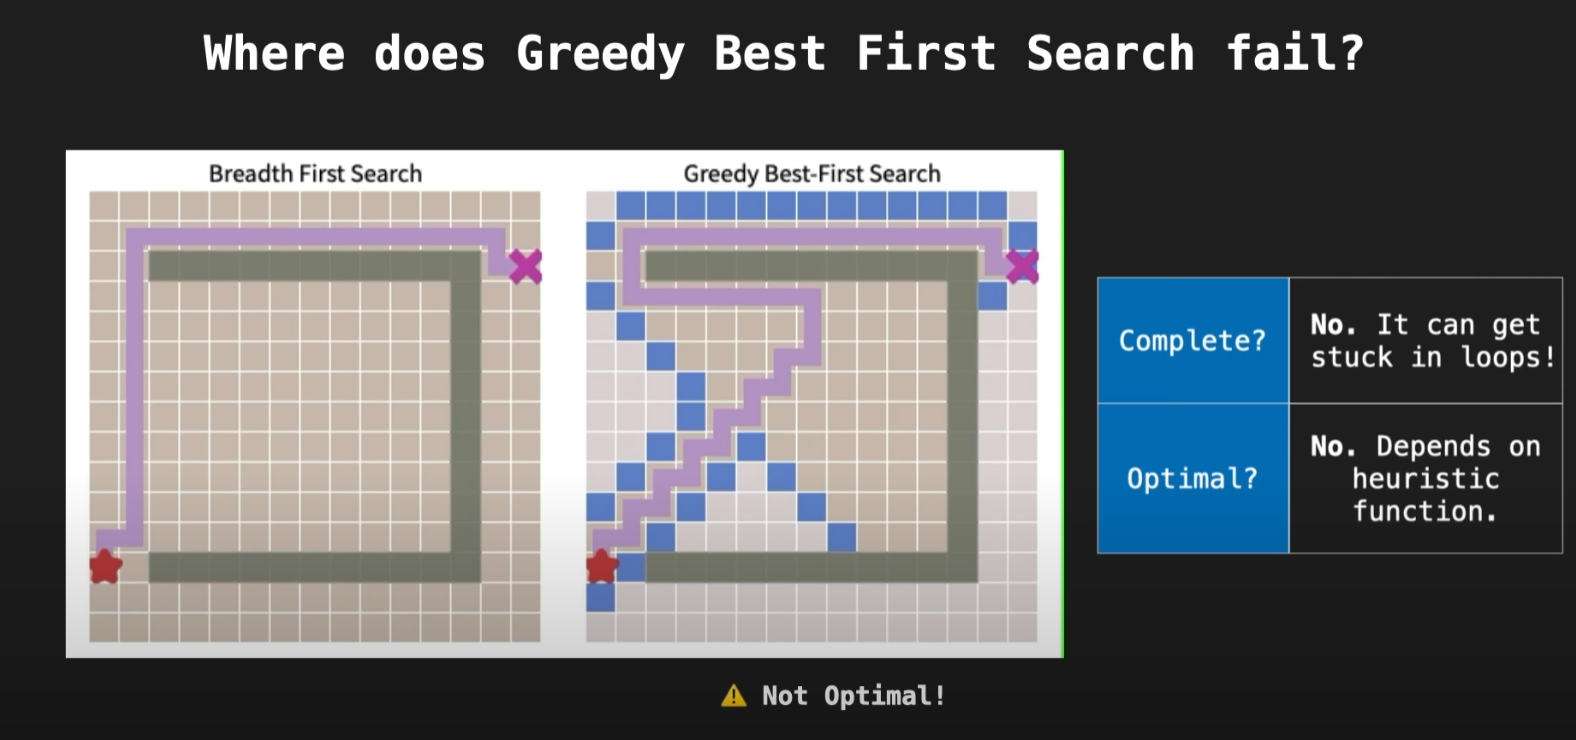

# REPORT- Q1B (A* Search):

Results:
- We reached the Goal Node, with a Path Cost of 39  
- The maximum number of frontier items we have is 29   
- We created 67 nodes.
- The Path taken is [<(8, 10)>, <(7, 10)>, <(6, 10)>, <(5, 10)>, <(5, 9)>, <(5, 8)>, <(6, 8)>, <(7, 8)>, <(8, 8)>, <(9, 8)>, <(10, 8)>, <(11, 8)>, <(11, 9)>]

In [10]:
### A* search

from queue import PriorityQueue

def a_star(maze):
    q = PriorityQueue()
    current_state = maze.initial

    goal_row = maze.goal[0]
    goal_col = maze.goal[1]
    
    frontier_node = Node(current_state)
    
    #store visited notes in dictionary
    visited_nodes = defaultdict(tuple)

    visited_nodes[current_state] = frontier_node
    count_node = 1
    
    q.put((0, frontier_node))
    
    frontier_count = q.qsize()
    max_frontier = 1

    while(not q.empty()):
        current_cost, expand_node = q.get()
        
        
        if(maze.is_goal(expand_node.state) ):
            #print(q.queue)
            print('A Star Goal reached!')
            pprint({'goal_node': expand_node, 'max_frontier': max_frontier})
            return {'goal_node': expand_node, 'max_frontier': max_frontier, 'count_node': count_node}
          
        
        for action in maze.actions_at_state(expand_node):
            s = maze.actions(action, expand_node.state)
            r = s['state'][0]
            c = s['state'][1]
            if(expand_node.state == s['state']): 
                continue

            visited_node = visited_nodes[(r,c)]
            
            if(not visited_node or visited_node.path_cost > expand_node.path_cost+s['cost']):
                frontier_node = Node(s['state'], expand_node, action, expand_node.path_cost+s['cost'])

                visited_nodes[r,c] = expand_node
                count_node += 1

                heur = abs(r-goal_row) + abs(10*(c-goal_col))
                a_star_cost = heur + (frontier_node.path_cost)
                q.put((a_star_cost, frontier_node)) 
                              
        frontier_count = q.qsize()
        max_frontier = max(max_frontier, frontier_count)
        
    #Goal not found    
    return False


solution_astar = a_star(maze)


trace_node = solution_astar['goal_node']
max_frontier = solution_astar['max_frontier']
count_node = solution_astar['count_node']
total_cost = trace_node.path_cost

path = [trace_node]
    
while(trace_node.parent != None):
    trace_node = trace_node.parent
    path.append(trace_node)

print('\n')
print('Total cost:')
print(total_cost, '\n')
    
print('Maximum number of frontiers:')
print(max_frontier, '\n')

print('Number of nodes created:')
print(count_node, '\n')

print('Path taken')
print(path[::-1])

A Star Goal reached!
{'goal_node': <(11, 9)>, 'max_frontier': 29}


Total cost:
39 

Maximum number of frontiers:
29 

Number of nodes created:
67 

Path taken
[<(8, 10)>, <(7, 10)>, <(6, 10)>, <(5, 10)>, <(5, 9)>, <(5, 8)>, <(6, 8)>, <(7, 8)>, <(8, 8)>, <(9, 8)>, <(10, 8)>, <(11, 8)>, <(11, 9)>]


# REPORT- Q1B (Greedy Search):

Results:
- We reached the Goal Node, with a Path Cost of 39  
- The maximum number of frontier items we have is 25   
- We created 46 nodes.
- The Path taken is [<(8, 10)>, <(7, 10)>, <(6, 10)>, <(5, 10)>, <(5, 9)>, <(5, 8)>, <(6, 8)>, <(7, 8)>, <(8, 8)>, <(9, 8)>, <(10, 8)>, <(11, 8)>, <(11, 9)>]

In [11]:
from queue import PriorityQueue

def greedy_bfs(maze):
    q = PriorityQueue()
    current_state = maze.initial

    goal_row = maze.goal[0]
    goal_col = maze.goal[1]
    frontier_node = Node(current_state)
    
    #store visited notes in dictionary
    visited_nodes = defaultdict(tuple)

    visited_nodes[current_state] = frontier_node
    count_node = 1
    
    q.put((0, frontier_node))
    
    frontier_count = q.qsize()
    max_frontier = 1

    while(not q.empty()):
        current_cost, expand_node = q.get()
        
        
        if(maze.is_goal(expand_node.state) ):
            #print(q.queue)
            print('Greedy Goal reached!')
            pprint({'goal_node': expand_node, 'max_frontier': max_frontier})
            return {'goal_node': expand_node, 'max_frontier': max_frontier, 'count_node': count_node}
          
        
        for action in maze.actions_at_state(expand_node):
            s = maze.actions(action, expand_node.state)
            r = s['state'][0]
            c = s['state'][1]
            if(expand_node.state == s['state']): 
                continue

            visited_node = visited_nodes[(r,c)]
            
            if(not visited_node or visited_node.path_cost > expand_node.path_cost+s['cost']):
                frontier_node = Node(s['state'], expand_node, action, expand_node.path_cost+s['cost'])

                visited_nodes[r,c] = expand_node
                count_node += 1

                heur = abs(r-goal_row) + abs(10*(c-goal_col))
                q.put((heur, frontier_node)) 
                              
        frontier_count = q.qsize()
        max_frontier = max(max_frontier, frontier_count)
        
    #Goal not found    
    return False


solution_greedy = greedy_bfs(maze)


trace_node = solution_greedy['goal_node']
max_frontier = solution_greedy['max_frontier']
count_node = solution_greedy['count_node']
total_cost = trace_node.path_cost

path = [trace_node]
    
while(trace_node.parent != None):
    trace_node = trace_node.parent
    path.append(trace_node)

print('\n')
print('Total cost:')
print(total_cost, '\n')
    
print('Maximum number of frontiers:')
print(max_frontier, '\n')

print('Number of nodes created:')
print(count_node, '\n')

print('Path taken')
print(path[::-1])

Greedy Goal reached!
{'goal_node': <(11, 9)>, 'max_frontier': 25}


Total cost:
39 

Maximum number of frontiers:
25 

Number of nodes created:
46 

Path taken
[<(8, 10)>, <(7, 10)>, <(6, 10)>, <(5, 10)>, <(5, 9)>, <(5, 8)>, <(6, 8)>, <(7, 8)>, <(8, 8)>, <(9, 8)>, <(10, 8)>, <(11, 8)>, <(11, 9)>]


# Final Analysis: Comparison of Search Algorithm


### a) Completeness:
- All methods managed to find the goal node. It should be stated that the order of opening the child makes a significant difference in the case of DFS. For all methods, we are opening the children in ['up', 'right', 'down', 'left'] order. 


- Hence, for DFS, since we are opening the right-most element on the frontier, the search would prefer to go left or down, which visually seems to be the better choice. If this order was changed, DFS may take a very long time.


### b) Path Cost:
- All except for DFS managed to find a path cost of 39. From theory, this should be the optimal/ best cost. 


- It is not surprising that DFS has a higher path cost- from the trace, the DFS path went to (7,10), (6,10), (5,10), (5,9), (5,8), etc. In other words, it went slightly downwards, all the way left until it hit the leftmost edge of the map, all the way down until it hit (0,0), and then went sequentially left to right of each row until it chanced upon the goal node. Again, this is logical given DFS chases down each path down to the deepest depth, without any consideration on the path cost or heuristic.


- The Greedy search also gave the optimal path cost, despite not taking the actual path cost into account from the initial node. In this case, the heuristic (h = 10x + y, as explained earlier, where x and y is the absolute value of the difference in horizontal and vertical distance from the goal node) actually plays an important role. With this heuristic, Greedy will tend to minimise long distances (ie, left or right movements) since it is projected to be further from the goal state. 


- Hence, Greedy tries to go up to (9,10), and then reverses downwards to (5,10). Once at (5,10), (5,9), a leftward move, is actually the best pick even though it moves left. This is because the horizontal distance to the goal at (11,9) is actually 0, and hence the 10x multiplier in our heuristic does not apply. From (5,9), it does take a more circuital route by opening (4,9) first, but this is quickly corrected, and eventually a move to open (5,8), is made, and the Greedy algorithmn then moves upwards all the way to goal. 


- As mentioned earlier, A* would result in an optimal path cost since our heuristic is admissable- it always understates the true cost to goal, bearing in mind that Up and Down is "further" in actual cost to the goal, and we also have blockers along the way.



### c) Max Number of Items in the Frontier:
- Among the uninformed search, IDS has the lowest number of items in the frontier at 23, while DFS has the highest at 306. BFS is slightly higher at 31, and UCS has 34. A Star and Greedy had 67 and 46 max items in the frontier respectively. 


- BFS and IDS opens all children at each depth- however, it stops earlier than DFS since it is opening all elements at each depth and does not get trapped down the longest path, hence it has a lower number of max items in the frontier. In other words, our goal state is visually nearer to the initial state (searched node is shallow), as compared to an alternate scenario where the goal state is on the edge of the map (searched node is deep), where BFS would have suffered more with much more elements in the frontier since it needs to open and remember every single child at each depth, this would grow substantially at each level. 


- Hence, in this case, DFS has a high number of items in the frontier as it expands downwards along one path, reaches the end, before going to the next one. Since we have a maze, where there are a max of 4 options at each square, and the deepest possible depth is significantly far down, it could go all the way right in theory, far deeper than the depth of the goal node.


- A* and Greedy would have slightly more items in the frontier, as at each stage, it is trying to pick the node with the lowest f, this may not neccesarily be downwards along the path that is it expanding. 



### d) Total Nodes Created:
- IDS creates the most nodes at 101122, DFS the next most at 640. BFS and UCS opens 201 and 127 respectively, while our informed search methods A* and Greedy creates the least at 67 and 46 respectively. 


- A key point to note is that UCS, A* and Greedy performs better than the rest here, with A* and Greedy creating about half of UCS. This is because in all 3, we take into account the fact that Up and Down are "further" than Left and Right, by a dramatic factor of 10. This also applies for Greedy, since the heuristic also captures this when estimating how far the "goal" is.


- Due to the way that the blockers are positioned in this scenario, this knowledge allows all 3 algorithms to navigate better. For example, at the initial state, up and down actions (cheaper) allows the agent to quickly take the shortest path downwards (up has a blocker at 10,10), and subsequently make the leftward turn around the (6,9) blocker. Once there, the upward path (cheaper) leads almost directly towards the goal state, and the agent only needs to make 1 right movement towards (11,9).  


- IDS creates the most nodes, as it goes through all the levels each time until it hits the cutoff depth. It also does not have a reached/ visited nodes check, so it would create more nodes than BFS. Similarly, DFS does not have a reached check, and could have expanded in different directions.

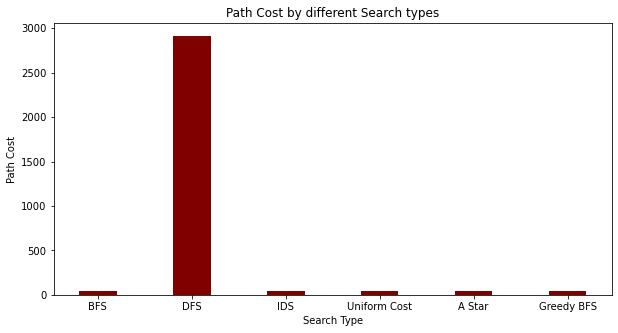

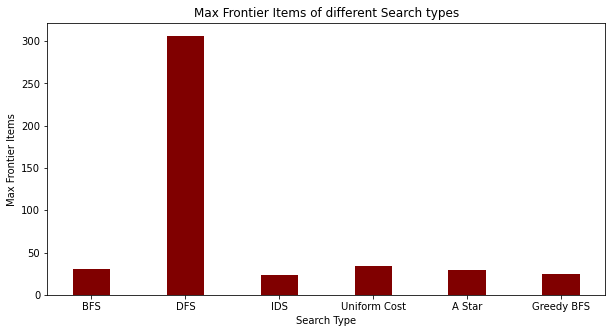

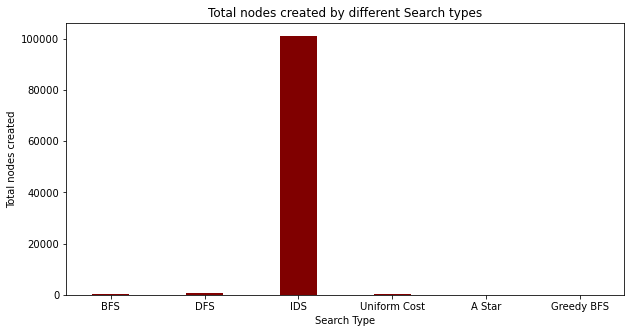

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# creating the dataset
data = {'BFS':39, 'DFS':2913, 'IDS':39,
        'Uniform Cost':39, 'A Star':39 , 'Greedy BFS': 39 }
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Search Type")
plt.ylabel("Path Cost")
plt.title("Path Cost by different Search types")
plt.show()


# creating the dataset
data = {'BFS':31, 'DFS':306, 'IDS':23,
        'Uniform Cost':34, 'A Star': 29, 'Greedy BFS': 25 }
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Search Type")
plt.ylabel("Max Frontier Items")
plt.title("Max Frontier Items of different Search types")
plt.show()

# creating the dataset
data = {'BFS':201, 'DFS':640, 'IDS':101122,
        'Uniform Cost':127, 'A Star': 67, 'Greedy BFS': 46 }
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Search Type")
plt.ylabel("Total nodes created")
plt.title("Total nodes created by different Search types")
plt.show()